In [1]:
from PIL import Image, ImageDraw, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import os


Kernel ridge regression with gaussian kernel

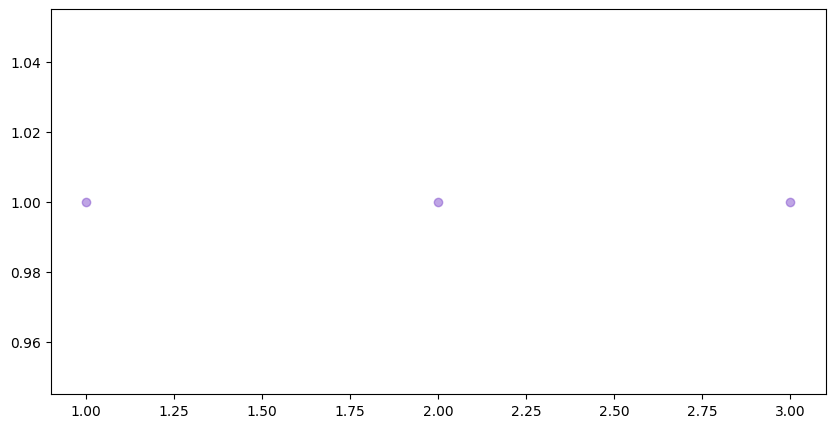

In [2]:
#generate and plot noise data
n = 3

X = np.array([1,2,3])
Y = np.array([1,1,1])

plt.figure(figsize=(10, 5))
plt.scatter(X,Y, alpha = 0.5, color = (0.5,0.3,0.8), label = "noisy points")
plt.show()

In [3]:
def rbf_kernel_function(x_i, x_j, sigma):
    #print(((np.abs(x_i - x_j))**2)/ (2 * sigma**2))
    return pow(np.exp(1), -((x_i - x_j)**2 / (2 * sigma**2)))

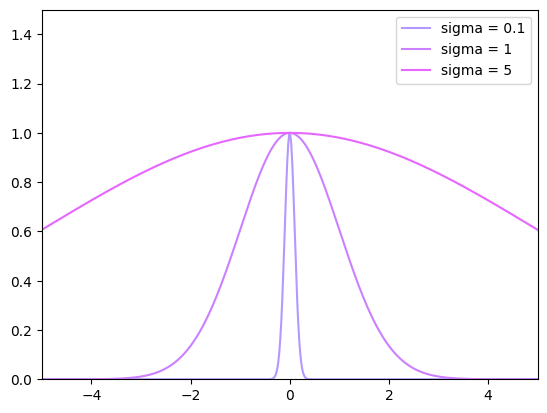

In [4]:
#visualize kernel function

X_lin = np.linspace(-5,5,500)
null_vector = np.ones((X_lin.shape)) * 0

Y_s01 = rbf_kernel_function(null_vector, X_lin, 0.1)
Y_s1 = rbf_kernel_function(null_vector, X_lin, 1)
Y_s5 = rbf_kernel_function(null_vector, X_lin, 5)

plt.xlim(-5, 5)
plt.ylim(0, 1.5)

plt.plot(X_lin,Y_s01, color = (0.7,0.6,1), label = "sigma = 0.1")
plt.plot(X_lin,Y_s1, color = (0.8,0.5,1), label = "sigma = 1")
plt.plot(X_lin,Y_s5, color = (0.9,0.4,1), label = "sigma = 5")
plt.legend()

plt.show()

In [5]:
def calc_K(X,sigma):
    K = np.zeros((n,n))
    for i in range(0,n):
        for j in range(0,n):
            K[i][j] =  rbf_kernel_function(X[i], X[j], sigma)
    return K

def calc_alpha(K, lamb):
    return np.linalg.inv(K + (lamb * np.identity(n))) @ Y.T

In [6]:
#Calculate Gram matrix
sigma = np.sqrt(2)
lambda_00001 = 0.0001


K_s141 = calc_K(X,np.sqrt(2))
alpha_s141_l00001 = calc_alpha(K_s141, 0.0001)

K_s070 = calc_K(X,np.sqrt(2)/2)
alpha_s070_l00001 = calc_alpha(K_s070, 0.0001)

K_s001 = calc_K(X,0.01)
alpha_s001_l00001 = calc_alpha(K_s001, 0.0001)

#alpha_s070_l00001, K_s070
#alpha_s141_l00001, K_s141

In [7]:
def calc_comb(sigmas, lambdas):
    comb = np.zeros((4,4,3))
    for i in range(0,4):
        for j in range(0,4):
            comb[i][j] = calc_alpha(calc_K(X, sigmas[i]), lambdas[j])
            #print(sigmas[i], lambdas[j])
    return comb

In [8]:
sigmas = np.array([10, np.sqrt(2), np.sqrt(2)/2, 0.01])
lambdas = np.array([0.0001, 0.001, 0.1, 1])

def calc_comb(sigmas, lambdas):
    comb = np.zeros((4,4,3))
    for i in range(0,4):
        for j in range(0,4):
            comb[i][j] = calc_alpha(calc_K(X, sigmas[i]), lambdas[j])
            #print(sigmas[i], lambdas[j])
    return comb

comb_matrix = calc_comb(sigmas, lambdas)
#print(comb_matrix[1][0], "\n")
#print(comb_matrix[1][1], "\n")
#comb_matrix


In [9]:
def pred_func(x,sigma, alpha):
    res = 0
    for i in range(len(X)):
        res = res + alpha[i] * rbf_kernel_function(X[i], x,sigma)
    return res

[ 12.81376238 -24.49725723  12.81376238]
[ 1.42723119 -1.22293524  1.42723119]
[0.84538767 0.37796072 0.84538767]
[0.99990001 0.99990001 0.99990001]


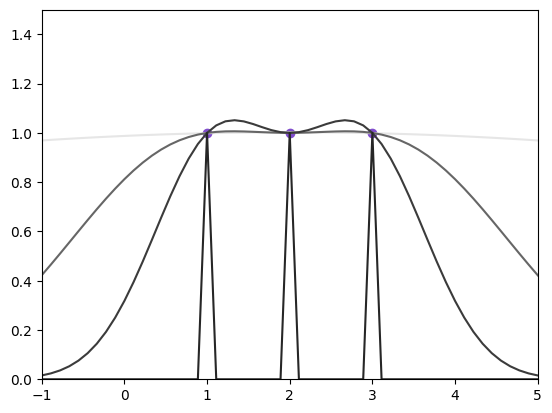

In [11]:
def rbf_kernel_function(x_i, x_j, sigma):
    #print(((np.abs(x_i - x_j))**2)/ (2 * sigma**2))
    return pow(np.exp(1), -((x_i - x_j)**2 / (2 * sigma**2)))

def calc_K(X,sigma):
    K = np.zeros((n,n))
    for i in range(0,n):
        for j in range(0,n):
            K[i][j] =  rbf_kernel_function(X[i], X[j], sigma)
    return K

def calc_alpha(K, lamb):
    return np.linalg.inv(K + (lamb * np.identity(n))) @ Y.T

#Calculate Gram matrix
sigma = np.sqrt(2)
lambda_00001 = 0.0001


K_s141 = calc_K(X,np.sqrt(2))
alpha_s141_l00001 = calc_alpha(K_s141, 0.0001)

K_s070 = calc_K(X,np.sqrt(2)/2)
alpha_s070_l00001 = calc_alpha(K_s070, 0.0001)

K_s001 = calc_K(X,0.01)
alpha_s001_l00001 = calc_alpha(K_s001, 0.0001)

sigmas = np.array([10, np.sqrt(2), np.sqrt(2)/2, 0.01])
lambdas = np.array([0.0001, 0.001, 0.1, 1])

def calc_comb(sigmas, lambdas):
    comb = np.zeros((4,4,3))
    for i in range(0,4):
        for j in range(0,4):
            comb[i][j] = calc_alpha(calc_K(X, sigmas[i]), lambdas[j])
            #print(sigmas[i], lambdas[j])
    return comb

comb_matrix = calc_comb(sigmas, lambdas)
#print(comb_matrix[1][0], "\n")
#print(comb_matrix[1][1], "\n")
#comb_matrix

def pred_func(x,sigma, alpha):
    res = 0
    for i in range(len(X)):
        res = res + alpha[i] * rbf_kernel_function(X[i], x,sigma)
    return res

X_lin = np.linspace(-1, 10, 100, dtype=float)
Y_pred  = np.zeros(X_lin.shape)

plt.xlim(-1, 5)
plt.ylim(0, 1.5)
plt.scatter(X,Y, color = (0.5,0.3,0.8))

for i in range(0,4):
    for j in range(len(X_lin)):
        alpha = comb_matrix[i][0]
        Y_pred[j] = pred_func(X_lin[j], sigmas[i], alpha)
    
    gre = (1/(i+1)-0.1,1/(i+1)-0.1,1/(i+1)-0.1)
    plt.plot(X_lin,Y_pred, color = gre)
    print(alpha)

plt.show()  

[ 12.81376238 -24.49725723  12.81376238]
[ 1.42723119 -1.22293524  1.42723119]
[0.84538767 0.37796072 0.84538767]
[0.99990001 0.99990001 0.99990001]


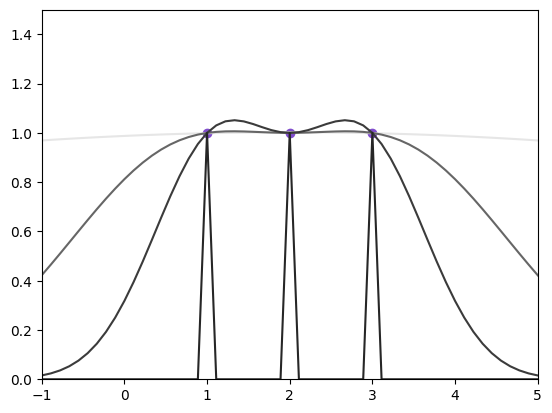

In [10]:
X_lin = np.linspace(-1, 10, 100, dtype=float)
Y_pred  = np.zeros(X_lin.shape)

plt.xlim(-1, 5)
plt.ylim(0, 1.5)
plt.scatter(X,Y, color = (0.5,0.3,0.8))

for i in range(0,4):
    for j in range(len(X_lin)):
        alpha = comb_matrix[i][0]
        Y_pred[j] = pred_func(X_lin[j], sigmas[i], alpha)
    
    gre = (1/(i+1)-0.1,1/(i+1)-0.1,1/(i+1)-0.1)
    plt.plot(X_lin,Y_pred, color = gre)
    print(alpha)

plt.show()  

[ 1.94387121 -2.86548673  1.94387121]
[ 1.41359791 -1.2006217   1.41359791]
[0.84453866 0.37824493 0.84453866]
[0.999001 0.999001 0.999001]


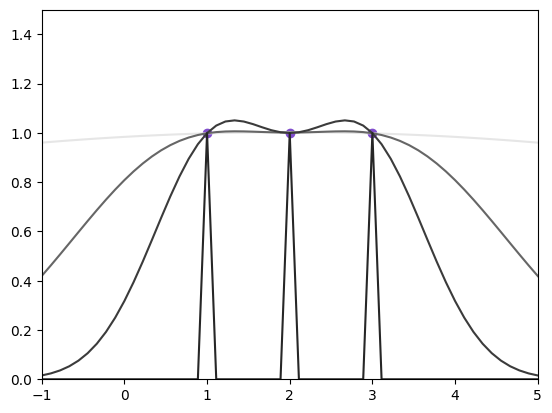

In [12]:
X_lin = np.linspace(-1, 10, 100, dtype=float)
Y_pred  = np.zeros(X_lin.shape)

plt.xlim(-1, 5)
plt.ylim(0, 1.5)
plt.scatter(X,Y, color = (0.5,0.3,0.8))

for i in range(0,4):
    for j in range(len(X_lin)):
        alpha = comb_matrix[i][1]
        Y_pred[j] = pred_func(X_lin[j], sigmas[i], alpha)
    
    gre = (1/(i+1)-0.1,1/(i+1)-0.1,1/(i+1)-0.1)
    plt.plot(X_lin,Y_pred, color = gre)
    print(alpha)

plt.show()  

[0.34073707 0.29265885 0.34073707]
[ 0.79978677 -0.22340829  0.79978677]
[0.76304157 0.39871399 0.76304157]
[0.90909091 0.90909091 0.90909091]


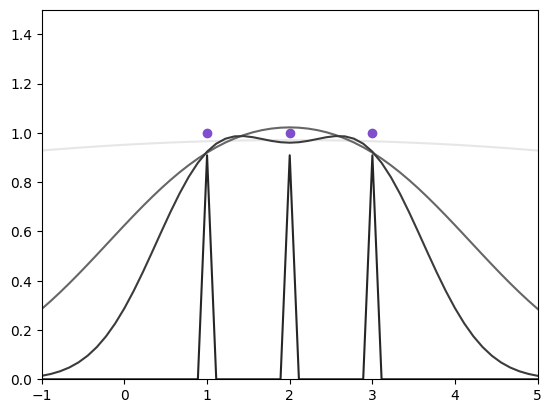

In [13]:
X_lin = np.linspace(-1, 10, 100, dtype=float)
Y_pred  = np.zeros(X_lin.shape)

plt.xlim(-1, 5)
plt.ylim(0, 1.5)
plt.scatter(X,Y, color = (0.5,0.3,0.8))

for i in range(0,4):
    for j in range(len(X_lin)):
        alpha = comb_matrix[i][2]
        Y_pred[j] = pred_func(X_lin[j], sigmas[i], alpha)
    
    gre = (1/(i+1)-0.1,1/(i+1)-0.1,1/(i+1)-0.1)
    plt.plot(X_lin,Y_pred, color = gre)
    print(alpha)

plt.show()  

[0.25249054 0.24876876 0.25249054]
[0.34666593 0.2300163  0.34666593]
[0.43338757 0.34056562 0.43338757]
[0.5 0.5 0.5]


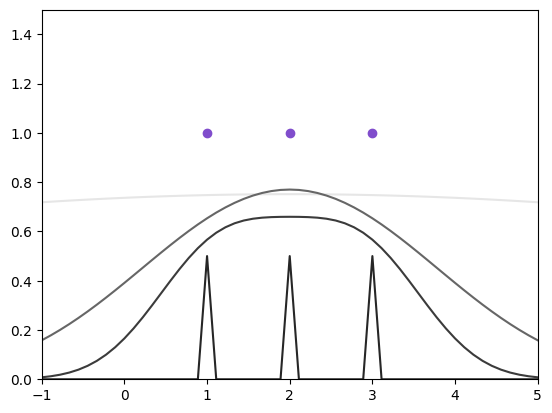

In [14]:
X_lin = np.linspace(-1, 10, 100, dtype=float)
Y_pred  = np.zeros(X_lin.shape)

plt.xlim(-1, 5)
plt.ylim(0, 1.5)
plt.scatter(X,Y, color = (0.5,0.3,0.8))

for i in range(0,4):
    for j in range(len(X_lin)):
        alpha = comb_matrix[i][3]
        Y_pred[j] = pred_func(X_lin[j], sigmas[i], alpha)
    
    gre = (1/(i+1)-0.1,1/(i+1)-0.1,1/(i+1)-0.1)
    plt.plot(X_lin,Y_pred, color = gre)
    print(alpha)

plt.show()  

0
[ 12.81376238 -24.49725723  12.81376238]
1
[ 1.94387121 -2.86548673  1.94387121]
2
[0.34073707 0.29265885 0.34073707]
3
[0.25249054 0.24876876 0.25249054]
1.4142135623730951


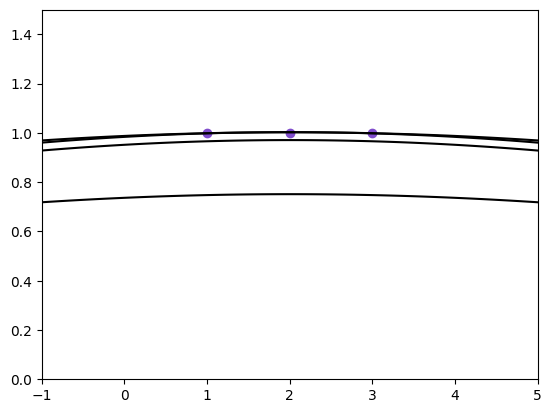

In [15]:
X_lin = np.linspace(-1, 10, 100, dtype=float)
Y_pred  = np.zeros(X_lin.shape)

plt.xlim(-1, 5)
plt.ylim(0, 1.5)
plt.scatter(X,Y, color = (0.5,0.3,0.8))

for i in range(0,4):
    for j in range(len(X_lin)):
        alpha = comb_matrix[0][i]
        Y_pred[j] = pred_func(X_lin[j], sigmas[0], alpha)
    
    gre = (1/(i+1)-0.1,1/(i+1)-0.1,1/(i+1)-0.1)
    plt.plot(X_lin,Y_pred, color = "black")
    print(i)
    print(alpha)
print(sigmas[1])
plt.show()  

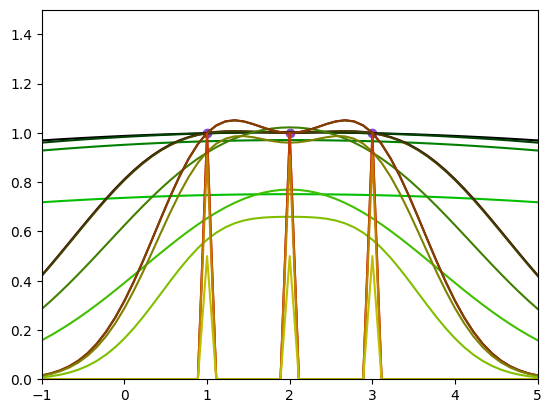

In [16]:
X_lin = np.linspace(-1, 10, 100, dtype=float)
Y_pred  = np.zeros(X_lin.shape)

plt.xlim(-1, 5)
plt.ylim(0, 1.5)
plt.scatter(X,Y, color = (0.5,0.3,0.8))

for k in range(0,4):
    for i in range(0,4):
        for j in range(len(X_lin)):
            alpha = comb_matrix[k][i]
            Y_pred[j] = pred_func(X_lin[j], sigmas[k], alpha)
        col = (k/4, i/4, 0)
        plt.plot(X_lin,Y_pred, color = col)

plt.show()  

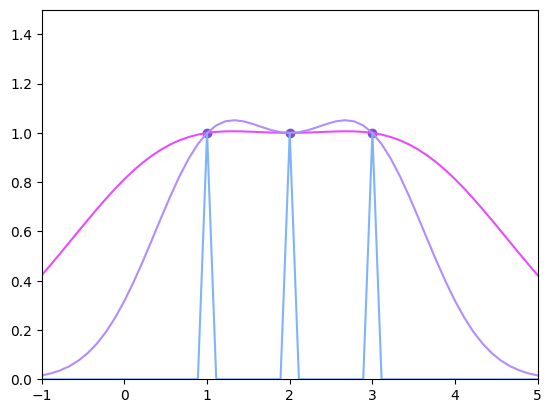

In [17]:

X_lin = np.linspace(-1, 10, 100, dtype=float)
Y_s141_l00001 = np.zeros(X_lin.shape)
Y_s070_l00001 = np.zeros(X_lin.shape)
Y_s001_l00001 = np.zeros(X_lin.shape)

for i in range(len(X_lin)):
    Y_s141_l00001[i] = pred_func(X_lin[i], np.sqrt(2), alpha_s141_l00001)

for i in range(len(X_lin)):
    Y_s070_l00001[i] = pred_func(X_lin[i], np.sqrt(2)/2, alpha_s070_l00001)

for i in range(len(X_lin)):
    Y_s001_l00001[i] = pred_func(X_lin[i], 0.01, alpha_s001_l00001)


plt.xlim(-1, 5)
plt.ylim(0, 1.5)
plt.scatter(X,Y, color = (0.5,0.3,0.8))
plt.plot(X_lin,Y_s141_l00001, color = (0.9,0.3,1))
plt.plot(X_lin,Y_s070_l00001, color = (0.7,0.55,1))
plt.plot(X_lin,Y_s001_l00001, color = (0.5,0.7,1))

plt.show()

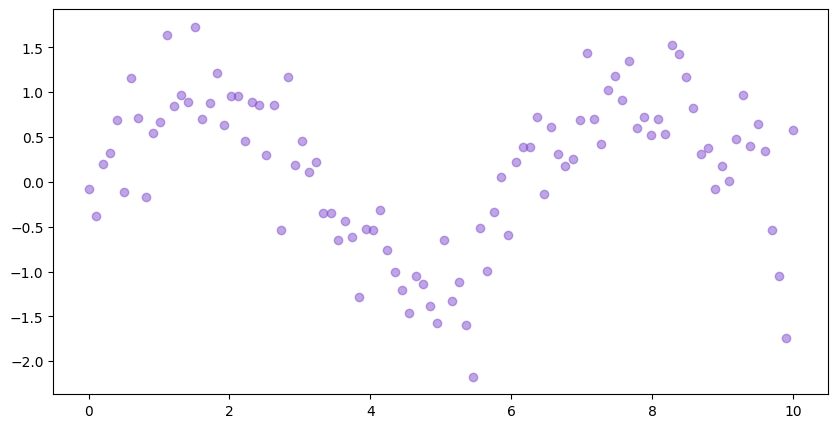

In [18]:
#generate and plot noise data
n = 100
X = np.linspace(0, 10, n, dtype=float)
Y = np.sin(X) + np.random.normal(0, 1, n) * 0.4
plt.figure(figsize=(10, 5))
plt.scatter(X,Y, alpha = 0.5, color = (0.5,0.3,0.8), label = "noisy points")
plt.show()

In [19]:
#sigmas = np.array([10, np.sqrt(2), np.sqrt(2)/2, 0.01])
#lambdas = np.array([0.0001, 0.001, 0.1, 1])

sigmas = np.array([0.01,0.1,1,10])
lambdas = np.array([0.01,0.1,1,10])

para = len(sigmas)

def calc_comb(sigmas, lambdas):
    comb = np.zeros((para,para,n))
    for i in range(0,para):
        for j in range(0,para):
            comb[i][j] = calc_alpha(calc_K(X, sigmas[i]), lambdas[j])
    return comb

comb_matrix = calc_comb(sigmas, lambdas)

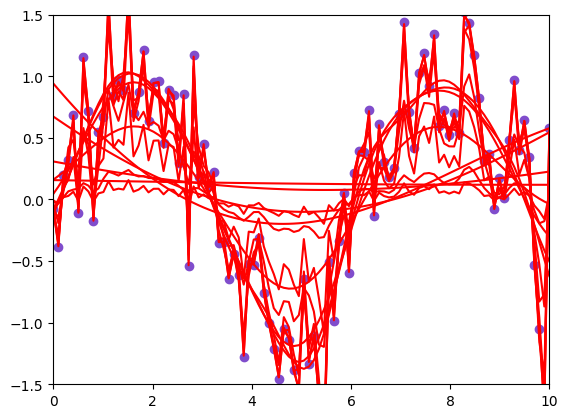

In [20]:
X_lin = np.linspace(0, 10, 100, dtype=float)
Y_pred  = np.zeros(X_lin.shape)

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)
plt.scatter(X,Y, color = (0.5,0.3,0.8))

for k in range(0,para):
    for i in range(0,para):
        for j in range(len(X_lin)):
            alpha = comb_matrix[k][i]
            Y_pred[j] = pred_func(X_lin[j], sigmas[k], alpha)
        plt.plot(X_lin,Y_pred, color = "red")

plt.show()  

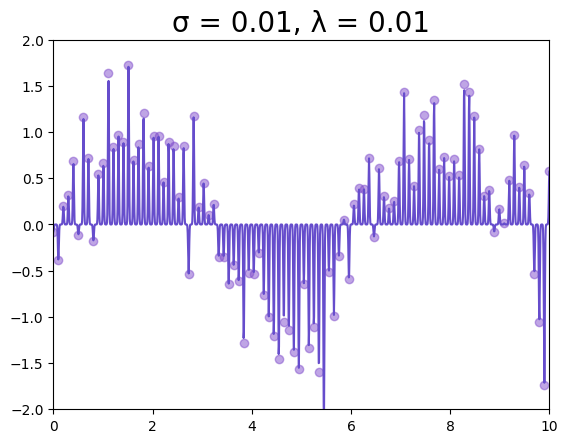

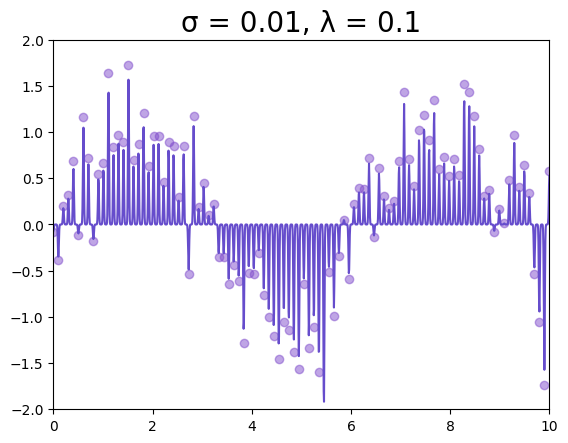

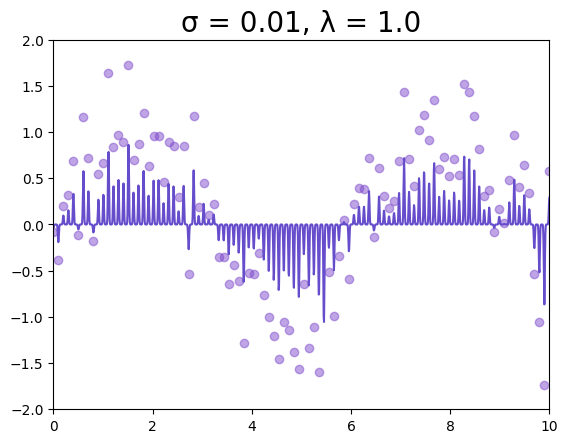

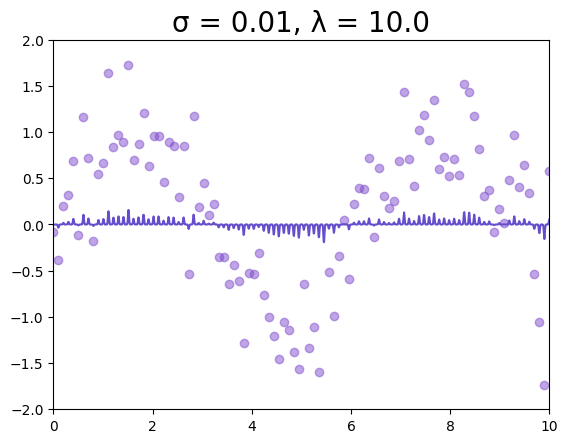

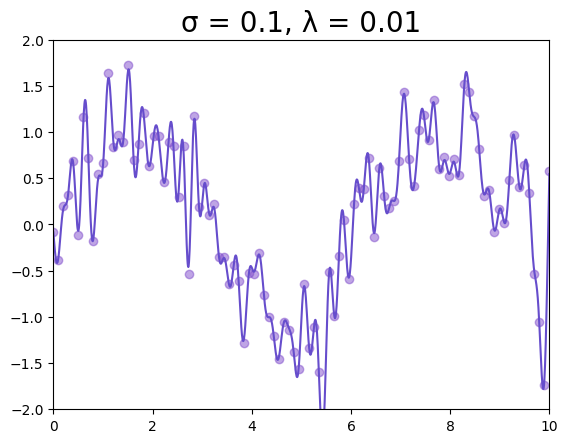

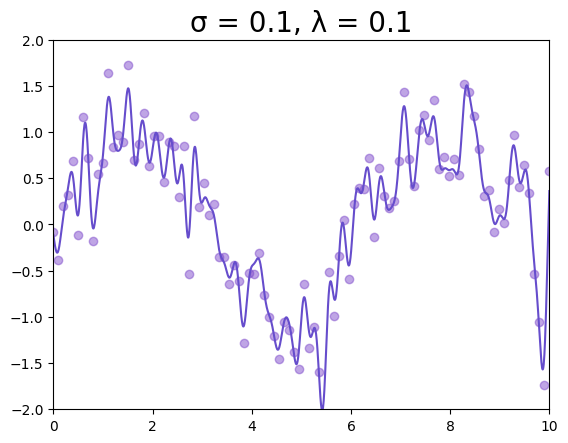

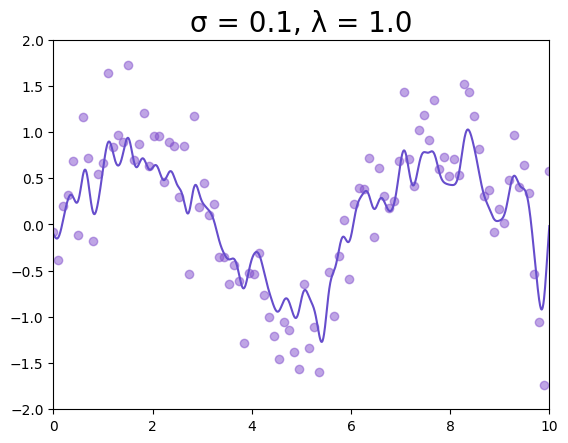

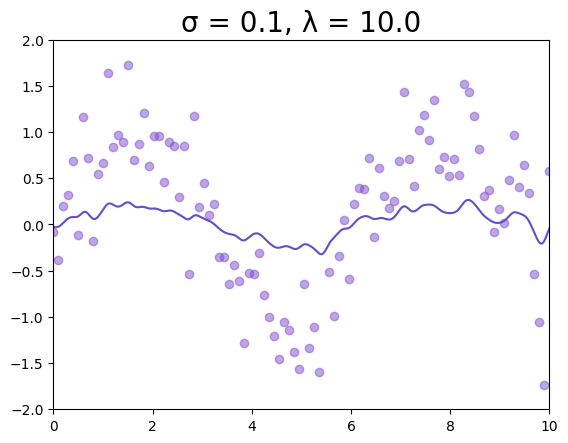

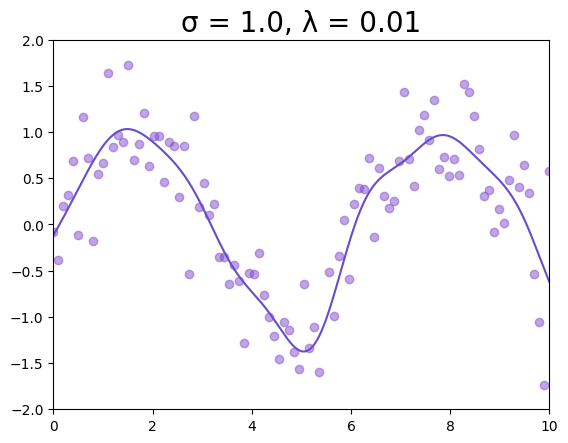

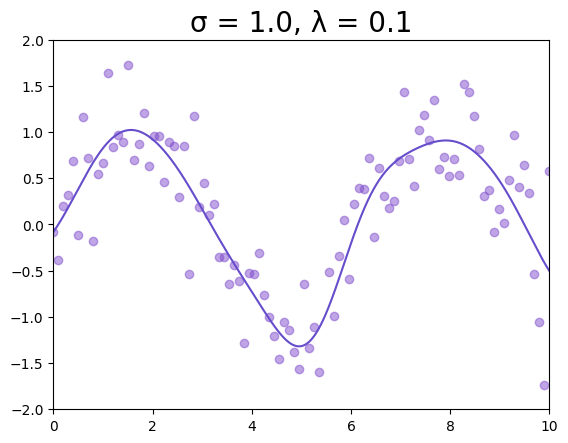

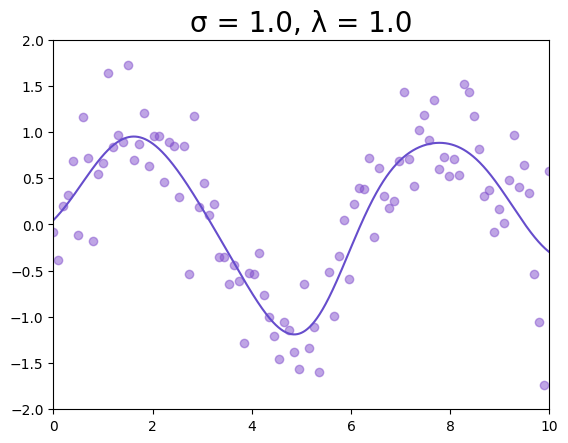

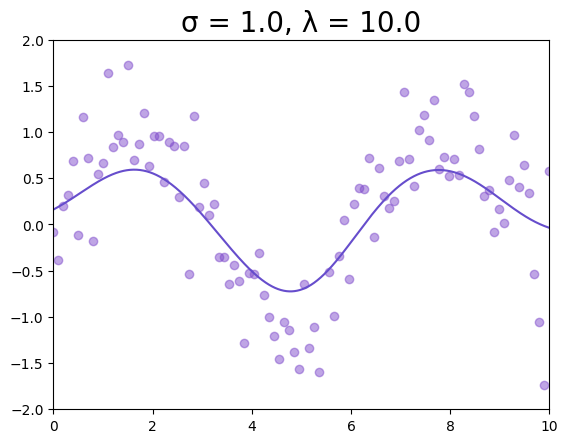

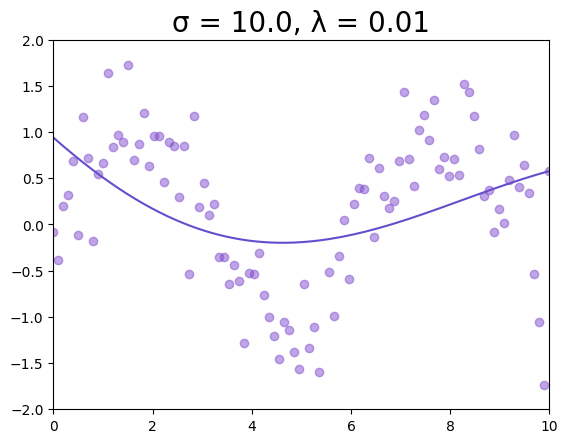

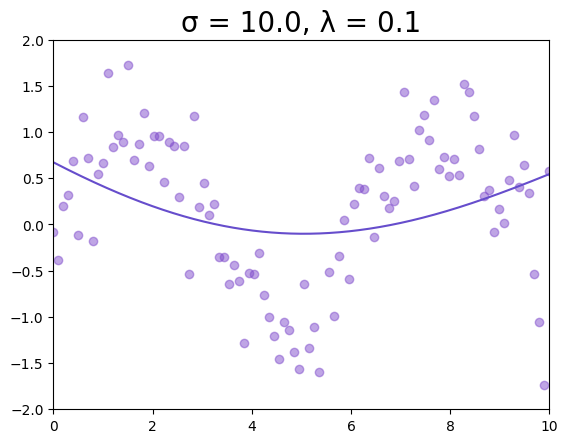

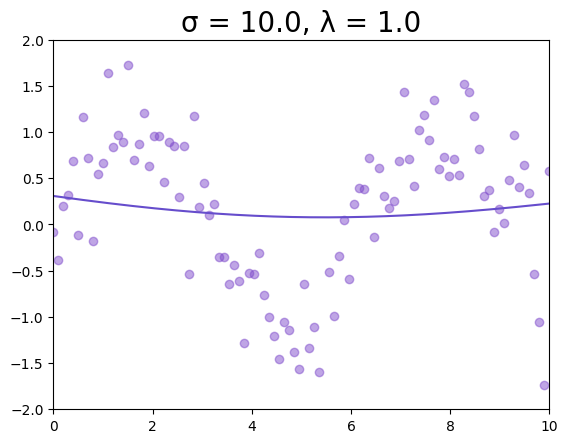

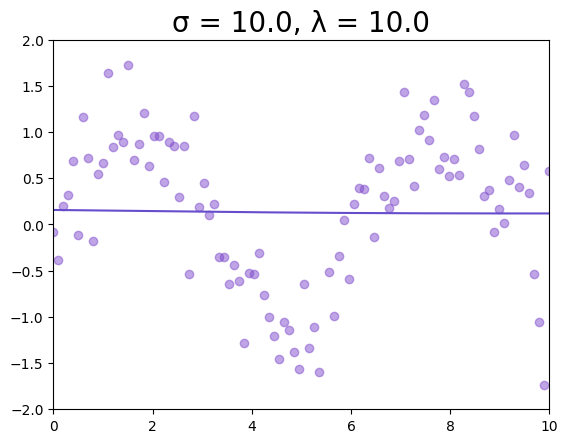

In [21]:
X_lin = np.linspace(0, 10, 1500, dtype=float)
Y_pred  = np.zeros(X_lin.shape)

n = 0
for k in range(0,para):
    for i in range(0, para):

        for j in range(len(X_lin)):
            alpha = comb_matrix[k][i]
            Y_pred[j] = pred_func(X_lin[j], sigmas[k], alpha)
        n = n + 1
        plt.xlim(0, 10)
        plt.ylim(-2, 2)
        plt.scatter(X,Y, color = (0.5,0.3,0.8), alpha = 0.5)
        plt.plot(X_lin,Y_pred, color = (0.4,0.3,0.8))
        plt.title(f"σ = {sigmas[k]}, λ = {lambdas[i]}", fontsize=20)
        plt.savefig(f"plots4/plot_{k}_{i}.png")
        plt.show()  

In [493]:
def create_collage(dir, rows, cols, shrink):
    image_files = [f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))]
    size_reference = Image.open(dir+image_files[0])
    c_width = size_reference.width * cols
    c_height = size_reference.height * rows
    collage = Image.new('RGB', (c_width, c_height))
    x_offset = 0
    y_offset = 0

    for image_file in image_files:
        image_path = os.path.join(dir, image_file)
        img = Image.open(image_path)
        img.thumbnail((c_width, c_height))
        collage.paste(img, (x_offset, y_offset))
    
        x_offset += img.width
        if x_offset >= c_width:
            x_offset = 0
            y_offset += img.height

    if (shrink > 1):
        new_width = int(c_width / shrink)  
        aspect_ratio = c_width / c_height
        new_height = int(new_width / aspect_ratio)
        collage = collage.resize((new_width, new_height), Image.ANTIALIAS)

    return collage

In [536]:
collage = create_collage("plots4/", 4, 4, 1)
collage.save("lambda_vs_sigma_sine_4_ver3.png")

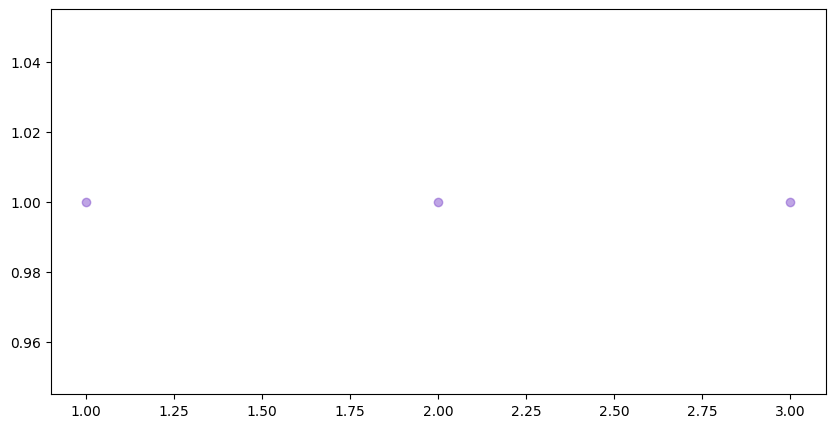

In [10]:
#generate and plot noise data
n = 3

X = np.array([1,2,3])
Y = np.array([1,1,1])

plt.figure(figsize=(10, 5))
plt.scatter(X,Y, alpha = 0.5, color = (0.5,0.3,0.8), label = "noisy points")
plt.show()

In [11]:
sigmas = np.array([0.01,0.1,1,10])
lambdas = np.array([0.01,0.1,1,10])

para = len(sigmas)

def calc_comb(sigmas, lambdas):
    comb = np.zeros((para,para,n))
    for i in range(0,para):
        for j in range(0,para):
            comb[i][j] = calc_alpha(calc_K(X, sigmas[i]), lambdas[j])
    return comb

comb_matrix = calc_comb(sigmas, lambdas)
comb_matrix

array([[[ 0.99009901,  0.99009901,  0.99009901],
        [ 0.90909091,  0.90909091,  0.90909091],
        [ 0.5       ,  0.5       ,  0.5       ],
        [ 0.09090909,  0.09090909,  0.09090909]],

       [[ 0.99009901,  0.99009901,  0.99009901],
        [ 0.90909091,  0.90909091,  0.90909091],
        [ 0.5       ,  0.5       ,  0.5       ],
        [ 0.09090909,  0.09090909,  0.09090909]],

       [[ 0.95829175, -0.16085808,  0.95829175],
        [ 0.79194588,  0.03574644,  0.79194588],
        [ 0.39420202,  0.26090439,  0.39420202],
        [ 0.08536525,  0.08149516,  0.08536525]],

       [[ 0.4995675 ,  0.00579031,  0.4995675 ],
        [ 0.34073707,  0.29265885,  0.34073707],
        [ 0.25249054,  0.24876876,  0.25249054],
        [ 0.07707879,  0.07696466,  0.07707879]]])

[0.99009901 0.99009901 0.99009901]


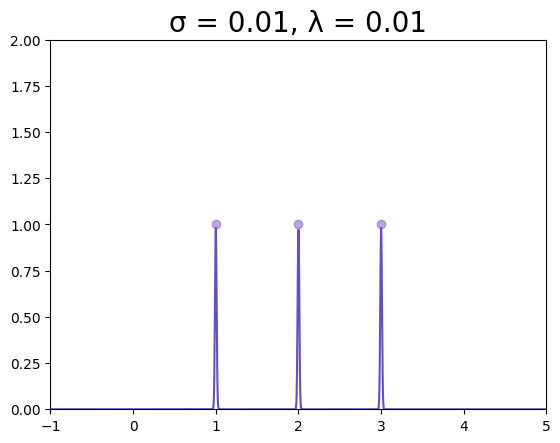

[0.90909091 0.90909091 0.90909091]


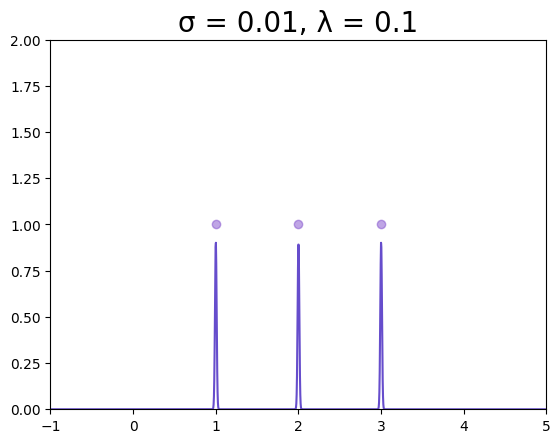

[0.5 0.5 0.5]


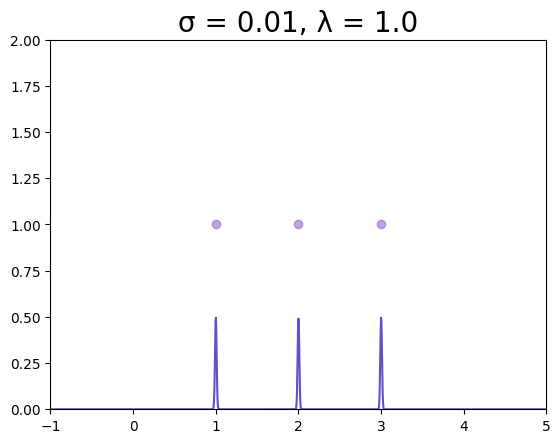

[0.09090909 0.09090909 0.09090909]


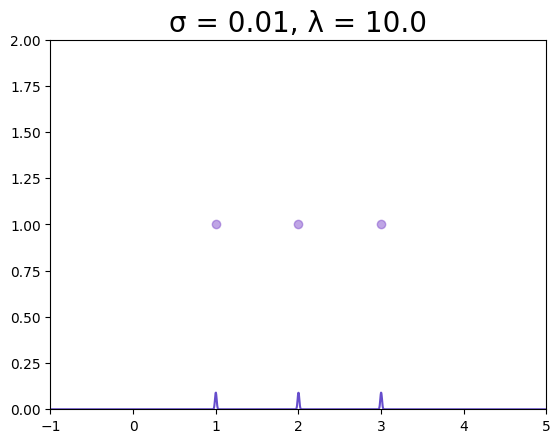

[0.99009901 0.99009901 0.99009901]


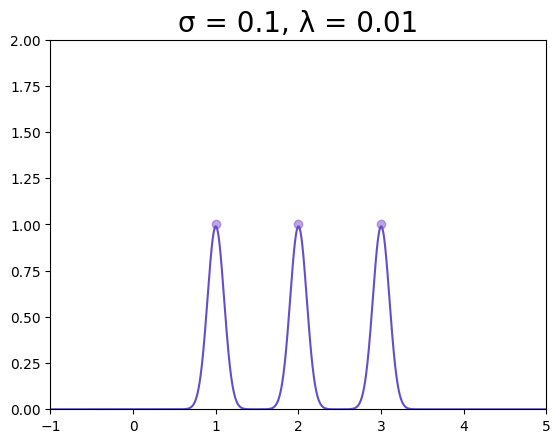

[0.90909091 0.90909091 0.90909091]


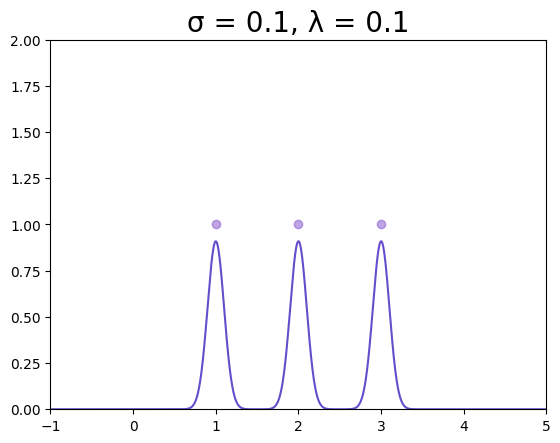

[0.5 0.5 0.5]


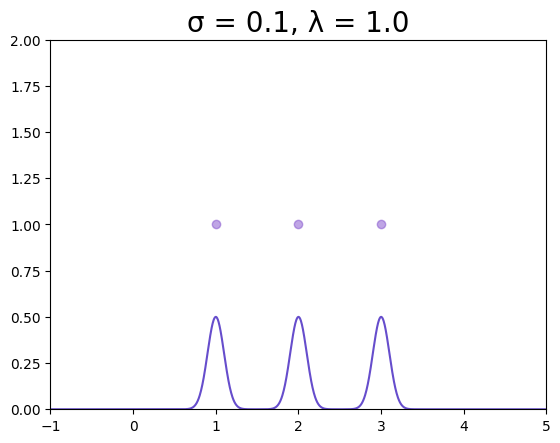

[0.09090909 0.09090909 0.09090909]


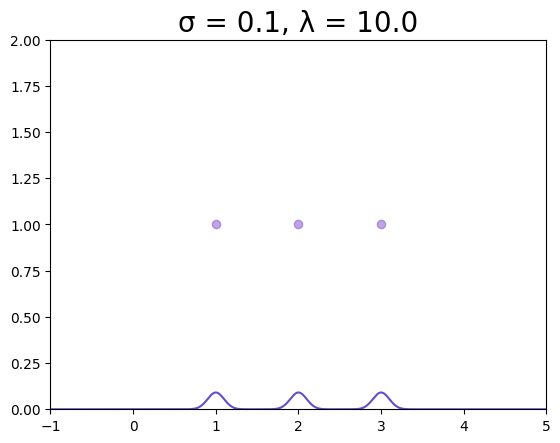

[ 0.95829175 -0.16085808  0.95829175]


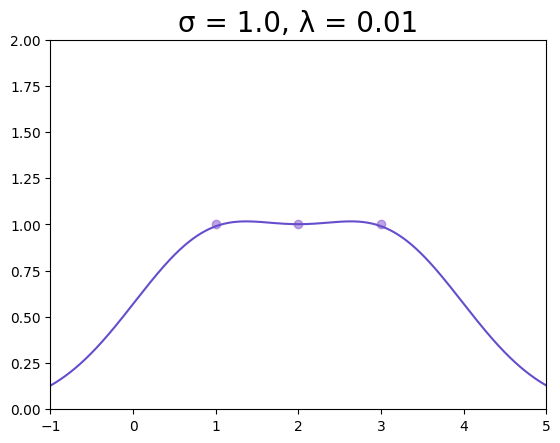

[0.79194588 0.03574644 0.79194588]


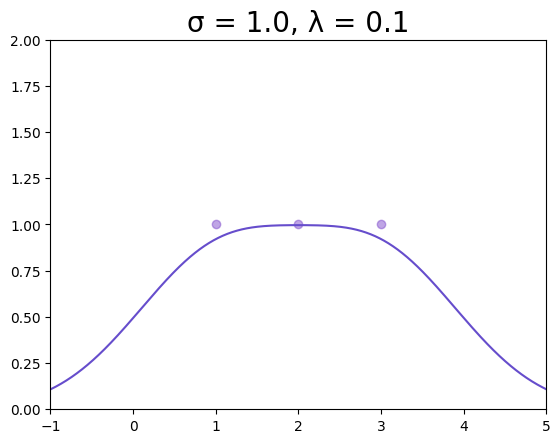

[0.39420202 0.26090439 0.39420202]


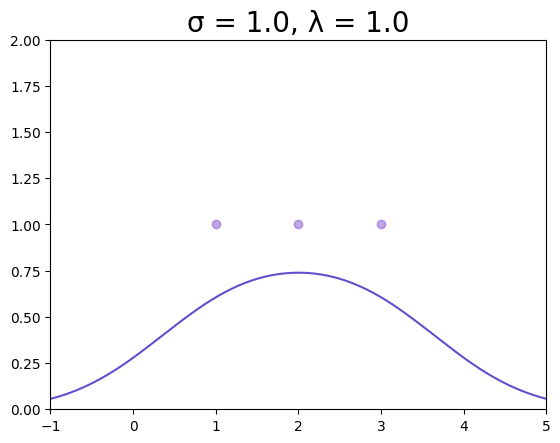

[0.08536525 0.08149516 0.08536525]


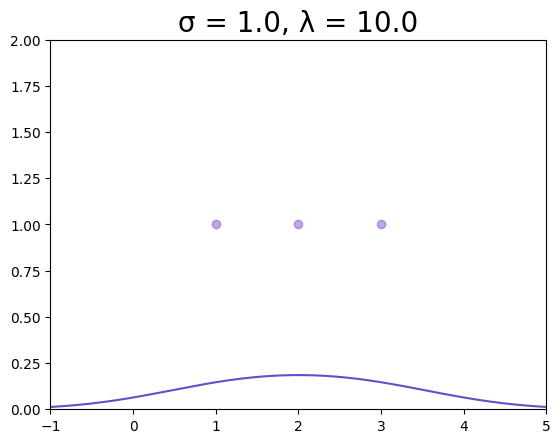

[0.4995675  0.00579031 0.4995675 ]


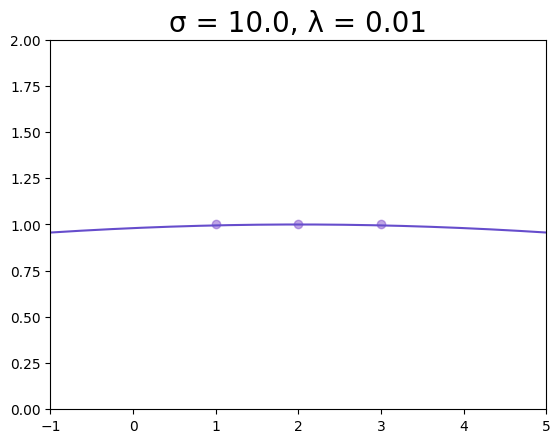

[0.34073707 0.29265885 0.34073707]


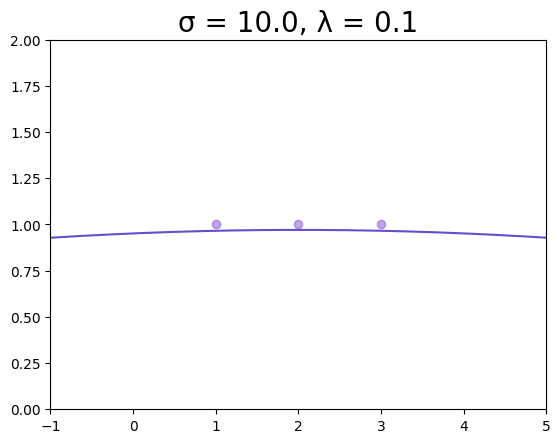

[0.25249054 0.24876876 0.25249054]


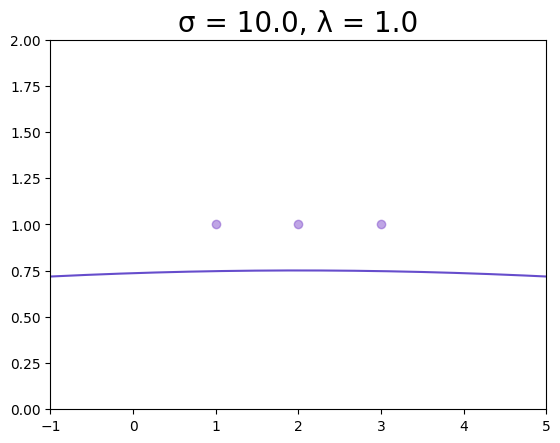

[0.07707879 0.07696466 0.07707879]


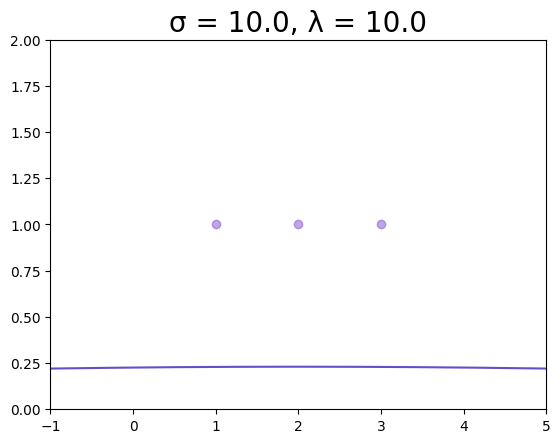

In [12]:
X_lin = np.linspace(-1, 5, 1500, dtype=float)
Y_pred  = np.zeros(X_lin.shape)

n = 0
for k in range(0,para):
    for i in range(0, para):

        for j in range(len(X_lin)):
            alpha = comb_matrix[k][i]
            Y_pred[j] = pred_func(X_lin[j], sigmas[k], alpha)
        n = n + 1
        plt.xlim(-1, 5)
        plt.ylim(0, 2)
        plt.scatter(X,Y, color = (0.5,0.3,0.8), alpha = 0.5)
        plt.plot(X_lin,Y_pred, color = (0.4,0.3,0.8))
        plt.title(f"σ = {sigmas[k]}, λ = {lambdas[i]}", fontsize=20)
        #plt.savefig(f"plots3/plot_{k}_{i}.png")
        print(comb_matrix[k][i])
        plt.show()  

In [541]:
collage = create_collage("plots3/", 4, 4, 2)
collage.save("lambda_vs_sigma_dots_4_ver2.png")

C:\Users\hanna\AppData\Local\Temp\ipykernel_6664\63367196.py:25: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  collage = collage.resize((new_width, new_height), Image.ANTIALIAS)


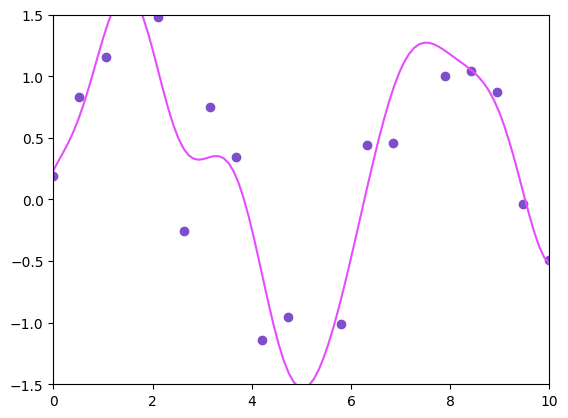

In [382]:

X_lin = np.linspace(0, 10, 100, dtype=float)
Y_s141_l00001 = np.zeros(X_lin.shape)

for i in range(len(X_lin)):
    Y_s141_l00001[i] = pred_func(X_lin[i], np.sqrt(2), alpha_s141_l00001)

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)
plt.scatter(X,Y, color = (0.5,0.3,0.8))
plt.plot(X_lin,Y_s141_l00001, color = (0.9,0.3,1))
plt.show()